# 🏦🤖 Loan Default Prediction using Deep Learning

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model # for saving the model

In [2]:
%matplotlib inline

In [3]:
# Reading the feature data
data_info=pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [4]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
# Making a function to get description
def feat_info(col):
    return data_info.loc[col]['Description']

In [7]:
feat_info('mort_acc')

'Number of mortgage accounts.'

In [8]:
# Reading the main Data
df=pd.read_csv('lending_club_loan_two.csv')

In [9]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Performing EDA:

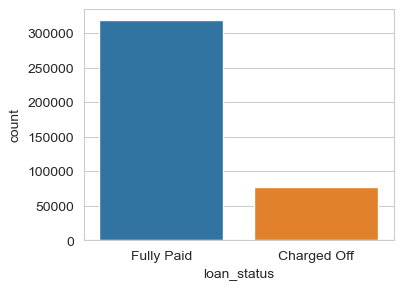

In [10]:
sns.set_style('whitegrid')
# Making a countplot based on loan status
plt.figure(figsize=(4,3))
sns.countplot(x='loan_status', data=df, hue='loan_status')
plt.show()  # people with fully paid loan status are relatively more

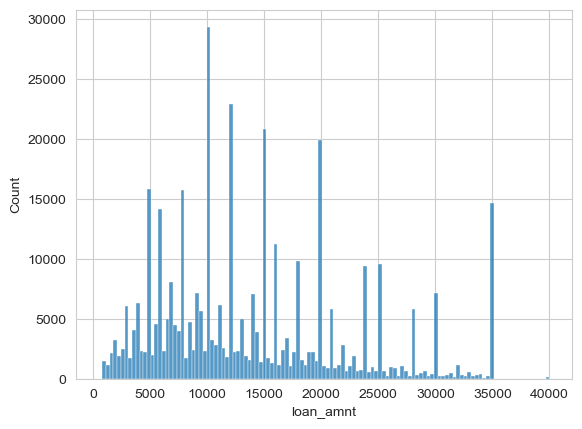

In [11]:
# Creating a histogram of the loan_amnt column
sns.histplot(df['loan_amnt'])
plt.show()

In [12]:
# explore correlation between the continuous feature variables
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


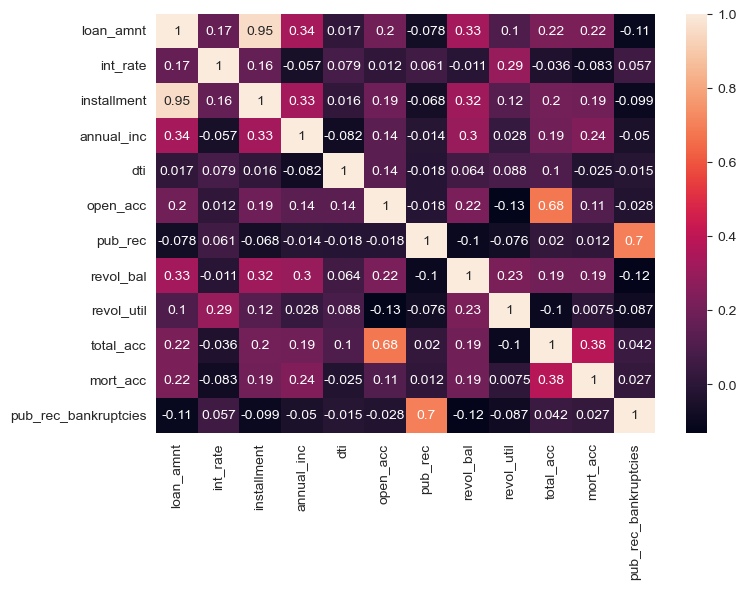

In [13]:
# Making a heatmap out of correlations
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.tight_layout()
plt.show()  # Installment and loan_amnt show extremely strong relationship

In [14]:
print(feat_info('loan_amnt'))
print('\n')
print(feat_info('installment'))

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


The monthly payment owed by the borrower if the loan originates.


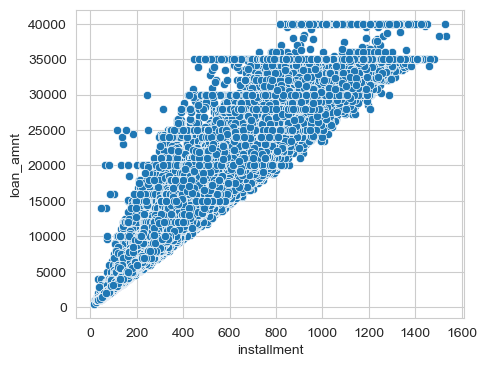

In [15]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='installment', y='loan_amnt', data=df)
plt.show()  # seems very linear

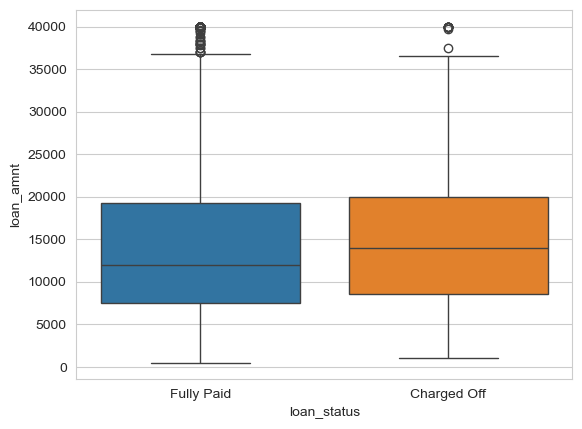

In [16]:
# Creating a boxplot showing the relationship between the loan_status and the Loan Amount
sns.boxplot(x='loan_status', y='loan_amnt', data=df, hue='loan_status')
plt.show()

In [17]:
# Calculating the summary statistics for the loan amount, grouped by the loan_status
df.groupby('loan_status').describe()

loan_amnt                                                      \
                count          mean          std     min     25%      50%   
loan_status                                                                 
Charged Off   77673.0  15126.300967  8505.090557  1000.0  8525.0  14000.0   
Fully Paid   318357.0  13866.878771  8302.319699   500.0  7500.0  12000.0   

                               int_rate             ... mort_acc        \
                 75%      max     count       mean  ...      75%   max   
loan_status                                         ...                  
Charged Off  20000.0  40000.0   77673.0  15.882587  ...      2.0  23.0   
Fully Paid   19225.0  40000.0  318357.0  13.092105  ...      3.0  34.0   

            pub_rec_bankruptcies                                               
                           count      mean       std  min  25%  50%  75%  max  
loan_status                                                                    
Charged Off              77586.0  0.128412  0.368853  0.0  0.0  0.0  0.0  8.0  
Fully Paid              317909.0  0.119997  0.352992  0.0  0.0  0.0  0.0  8.0  

[2 rows x 96 columns]

In [18]:
# exploring the Grade and SubGrade columns that LendingClub attributes to the loans. Finding the unique possible grades and subgrades
print(df['grade'].unique())
print('\n')
print(df['sub_grade'].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


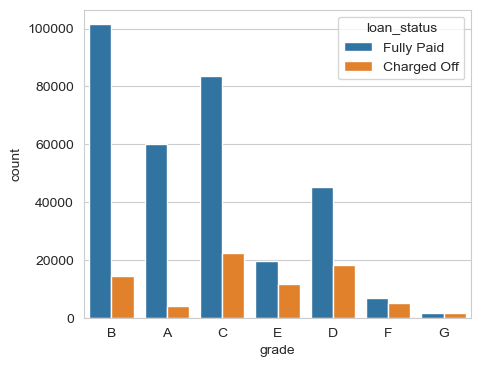

In [19]:
# Creating a countplot per grade
plt.figure(figsize=(5,4))
sns.countplot(x='grade', data=df, hue='loan_status')
plt.show()

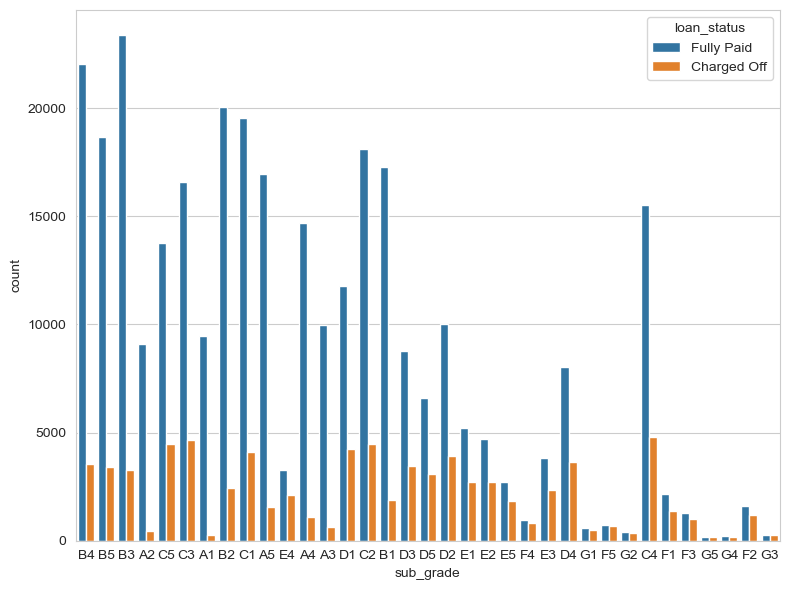

In [20]:
# Doing the same for subgrade
plt.figure(figsize=(8,6))
sns.countplot(x='sub_grade', data=df, hue='loan_status')
plt.tight_layout()
plt.show()

In [21]:
# Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off"
def paid_or_charged(col):
    if col=='Fully Paid':
        return 1
    elif col=='Charged Off':
        return 0
    else:
        return col

In [22]:
df['loan_repaid']=df['loan_status'].apply(paid_or_charged)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Data PreProcessing:

In [23]:
print(len(df))

396030


In [24]:
# Creating a Series that displays the total count of missing values per column
missing_values=df.isnull().sum()
missing_values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [25]:
missing_values_percent=(missing_values/len(df))*100
missing_values_percent  # percentage of missing values wrt dataframe

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [26]:
# examining emp_title and emp_length to see whether it will be okay to drop them
print(feat_info('emp_title'))
print('\n')
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [27]:
# Total unique job titles
df['emp_title'].nunique()

173105

In [28]:
# Realistically, making dummies for more than 173k job titles is a lot, so removing it
df.drop('emp_title', axis=1, inplace=True)

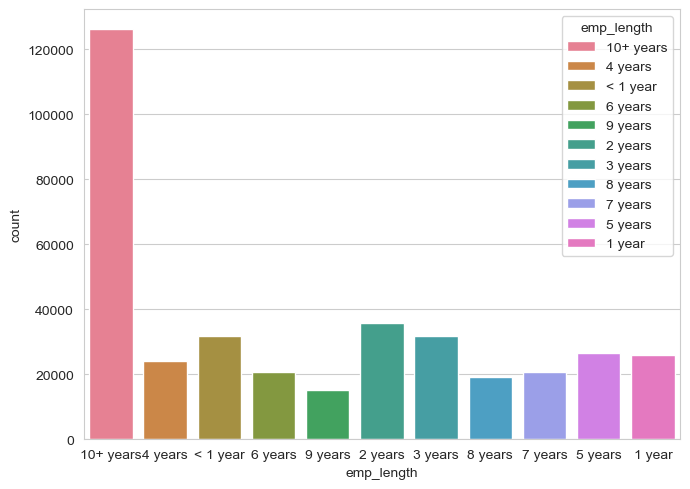

In [29]:
#  Creating a count plot of the emp_length 
plt.figure(figsize=(7,5))
sns.countplot(x='emp_length', data=df, hue='emp_length')
plt.tight_layout()
plt.show()

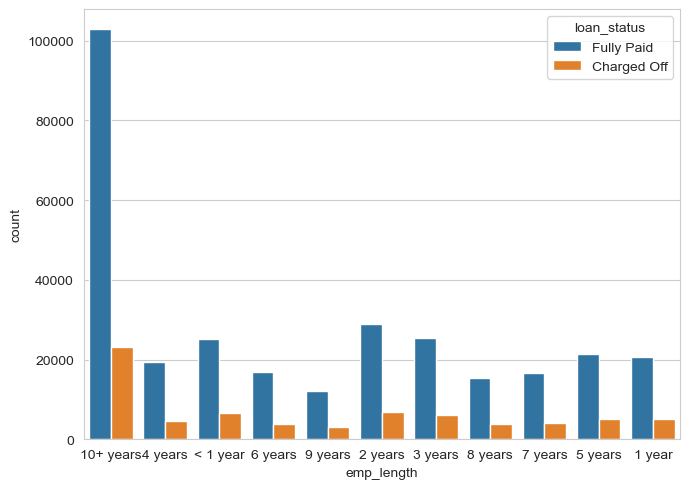

In [30]:
#  Creating a count plot of the emp_length (using loan status as hue)
plt.figure(figsize=(7,5))
sns.countplot(x='emp_length', data=df, hue='loan_status')
plt.tight_layout()
plt.show()

In [31]:
df.groupby('emp_length')['loan_repaid'].mean().sort_values(ascending=False) 

emp_length
10+ years    0.815814
6 years      0.810806
5 years      0.807813
4 years      0.807615
2 years      0.806738
7 years      0.805226
3 years      0.804769
1 year       0.800865
8 years      0.800240
9 years      0.799530
< 1 year     0.793128
Name: loan_repaid, dtype: float64

In [32]:
# # similar values above suggest emp_length is not the best factor for determining loan status, dropping it
df.drop('emp_length', axis=1, inplace=True)

In [33]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [34]:
# Checking the title and purpose
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [35]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [36]:
# title and purpose have the same content, dropping title
df.drop('title', axis=1, inplace=True)

In [37]:
# checking the mort_acc column
print(feat_info('mort_acc'))

Number of mortgage accounts.


In [38]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [39]:
df.corr(numeric_only=True)['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [40]:
# total_acc correlates with mort_acc more compared to the others
mean_mort_by_tot=df.groupby('total_acc')['mort_acc'].mean()

In [41]:
# filling missing values for mort_acc
df['mort_acc']=df['mort_acc'].fillna(df['total_acc'].map(mean_mort_by_tot).fillna(0))

In [42]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [43]:
# Dropping bankruptcies and revol_until as they are less percentage of data
df.drop(['revol_util', 'pub_rec_bankruptcies'], axis=1, inplace=True)

In [44]:
df.isnull().sum()  # Data is now cleaned

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

## Dummy variables for model training compatibility:

In [45]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'address', 'loan_repaid'],
      dtype='object')

In [46]:
# For term column
df['term'].value_counts()  # there's only 2 terms in form of strings

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [47]:
# Cleaning strings FIRST, then map, removing leading/trailing whitespace
df['term'] = (df['term'].str.strip().map({'36 months': 36, '60 months': 60}))
print(df['term'].value_counts())

term
36    302005
60     94025
Name: count, dtype: int64


In [48]:
# We have subgrades, so dropping grade
df.drop('grade', axis=1, inplace=True)

In [49]:
# subgrade column
subgrade_dum=pd.get_dummies(df['sub_grade'], drop_first=True)
df=pd.concat([df.drop('sub_grade', axis=1), subgrade_dum], axis=1)

In [50]:
# Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables
df=pd.get_dummies(df, columns=['verification_status', 'application_type','initial_list_status','purpose'], drop_first=True)

In [51]:
# home_owneship column
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [52]:
# Making NONE and ANY to OTHER and getting dummy variables
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df=pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

In [53]:
# Making a zip code column out of address
df['zip code']=df['address'].str.split().str[-1]  # since last line of address is zip code

In [54]:
# Dropping the address column and making dummy variable for zip codes
df=pd.get_dummies(df, columns=['zip code'], drop_first=True)
df.drop('address', axis=1, inplace=True)

In [55]:
# issue_d would cause leakage, so dropping it
df.drop('issue_d', axis=1, inplace=True)

In [56]:
# earliest_cr_line
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'], format='%b-%Y') # converting to datetime object
df['earliest_cr_year']=df['earliest_cr_line'].dt.year

In [57]:
# Dropping the # earliest_cr_line column
df.drop('earliest_cr_line', axis=1, inplace=True)

In [58]:
# Making sure our data is clean
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
zip code_48052      0
zip code_70466      0
zip code_86630      0
zip code_93700      0
earliest_cr_year    0
Length: 78, dtype: int64

## Preparing data for model

In [59]:
# dropping loan_status as we had created loan_repaid column
df.drop('loan_status', axis=1, inplace=True)

In [60]:
# Features and Target sets
X=df.drop('loan_repaid', axis=1).to_numpy()
y=df['loan_repaid'].to_numpy()

In [61]:
# Training and Testting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [62]:
# Normalizing the data

In [63]:
scaler=MinMaxScaler()  # Making a scaler object

In [64]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creating the model

In [65]:
model=Sequential()

In [66]:
model.add(Dense(78, activation='relu', input_dim=X_train.shape[1]))  # input_dim: number of input features
model.add(Dropout(0.2)) # 20 percent droput

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # output layer

model.compile(optimizer='adam', loss='binary_crossentropy') # compiling the model

In [67]:
# Fitting and Training the model
model.fit(x=X_train, y=y_train, epochs=25, batch_size=250, validation_data=(X_test, y_test))

Epoch 1/25
1268/1268 [==============================] - 1s 633us/step - loss: 0.2924 - val_loss: 0.2622
Epoch 2/25
1268/1268 [==============================] - 1s 595us/step - loss: 0.2638 - val_loss: 0.2601
Epoch 3/25
1268/1268 [==============================] - 1s 591us/step - loss: 0.2619 - val_loss: 0.2602
Epoch 4/25
1268/1268 [==============================] - 1s 595us/step - loss: 0.2613 - val_loss: 0.2595
Epoch 5/25
1268/1268 [==============================] - 1s 594us/step - loss: 0.2608 - val_loss: 0.2603
Epoch 6/25
1268/1268 [==============================] - 1s 596us/step - loss: 0.2603 - val_loss: 0.2593
Epoch 7/25
1268/1268 [==============================] - 1s 592us/step - loss: 0.2598 - val_loss: 0.2592
Epoch 8/25
1268/1268 [==============================] - 1s 594us/step - loss: 0.2595 - val_loss: 0.2591
Epoch 9/25
1268/1268 [==============================] - 1s 595us/step - loss: 0.2592 - val_loss: 0.2585
Epoch 10/25
1268/1268 [==============================] - 1s 584u

In [68]:
# Saving the Model
model.save('dl_proj_upd.h5')

/Users/krishmakwana/anaconda3/envs/jupyterfix/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluating Model Performance:

In [69]:
losses=pd.DataFrame(model.history.history)

<Figure size 500x400 with 0 Axes>

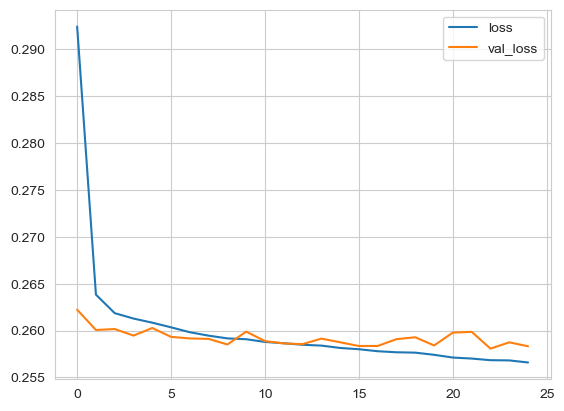

In [70]:
plt.figure(figsize=(5,4))
losses[['loss', 'val_loss']].plot()
plt.show()  # both decrease and stabalize together, model seems to perform good

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
predictions=(model.predict(X_test) > 0.5).astype("int32") 

2476/2476 [==============================] - 0s 171us/step


In [73]:
# Classification report and confusion matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions)) 

[[ 7007  8486]
 [  285 63428]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.78     79206
weighted avg       0.90      0.89      0.87     79206



## Using model on random inputs:

In [74]:
# input
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.0
term                     60
int_rate              13.11
installment          547.43
annual_inc          85000.0
                     ...   
zip code_48052        False
zip code_70466        False
zip code_86630        False
zip code_93700        False
earliest_cr_year       1991
Name: 304691, Length: 76, dtype: object

In [75]:
new_customer = np.array(new_customer, dtype=np.float32).reshape(1, -1)

In [76]:
model.predict(new_customer)

1/1 [==============================] - 0s 9ms/step


array([[1.]], dtype=float32)

In [77]:
# Our model predicted 1, lets see if it got it right
df.iloc[random_ind]['loan_repaid']  # This person did end up paying their loan

1